## plotting After-process data 

In [2]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import numpy as np
import MySQLdb
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
import datetime 
import random
import statistics 
%matplotlib inline  


"""
unit >> bill
"""

import pandas as pd
import matplotlib.pyplot as plt
import MySQLdb
import time

from sympy import *
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr

# x = raw_input('What about Ft?')
# Ft = float(x)
Ft = -0.048
t1 = 3.2484      # rate_1
t2 = 4.2218      # rate_2
t3 = 4.4217      # rate_3
ser = 38.22      # service_charge
u = symbols('u')

def bill(allpow):    
    ## Fundamental parameter
    if allpow == 0:
        bath = 0
    elif 1 <= allpow <= 150:
        bath = allpow*t1
    elif  151 <= allpow <= 400:
        power = allpow-150
        bath_1 = 150*t1
        bath_2 = power*t2
        bath = bath_1+bath_2
    else:
        power = allpow-150
        bath_1 = 150*t1
        power = power-250
        bath_2 = 250*t2
        bath_3 = power*t3
        bath = bath_1+bath_2+bath_3   
    service_price = 38.22  #permonth (fixed)   
    ## FT -33.2 satang/unit
    FT_price = allpow*Ft
    ## VAT 7%
    VAT_price = ((service_price+bath)+FT_price)*0.07
    bill = bath+service_price+FT_price+VAT_price
    return round(bill,2)

#### plotting month1 : October

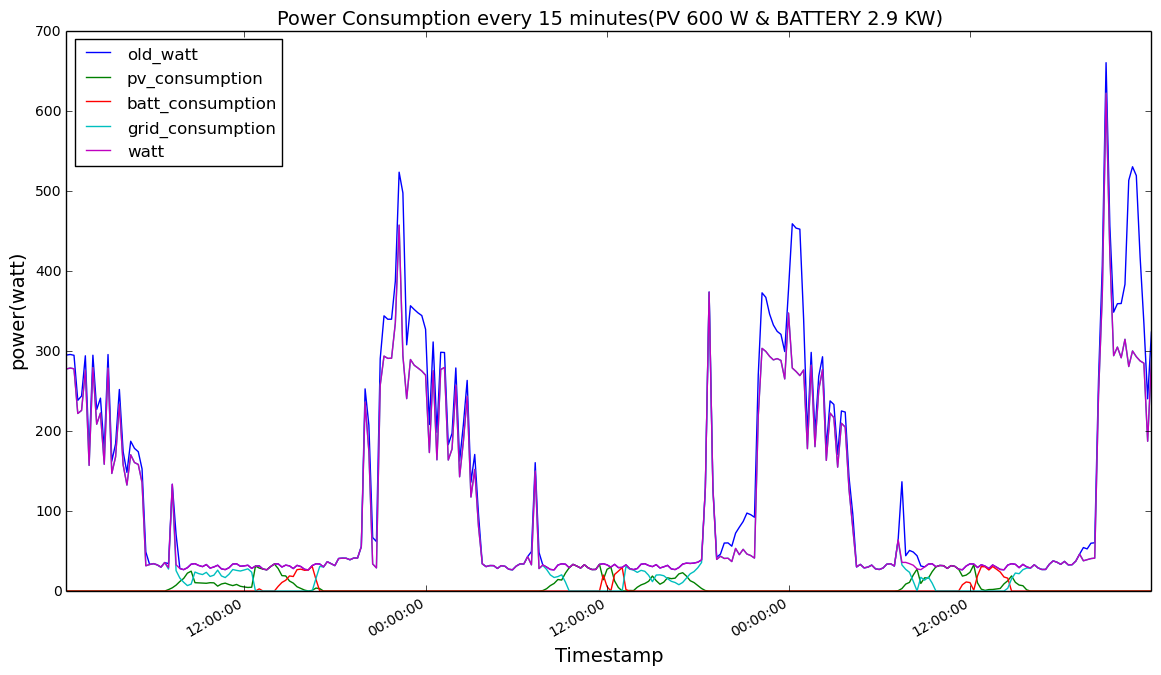

In [5]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2016-10-18 00:00:00'
time_b = '2016-10-20 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption,watt FROM thesis.main1 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

In [7]:
d = 31
time_a = pd.date_range('2016-10-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-10-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT Timestamp,old_watt,grid_consumption,watt FROM thesis.main1 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm & PVBATT || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"


2016-10-01 00:00:00 to 2016-10-31 23:59:59
Total unit consumption || No-algorithm & PVBATT || equal to 383.111085 kW equal to 1595.63 bath
Total unit consumption equal to 338.9705596 kW equal to 1398.5 bath
Total power consumption from PEA equal to 291.87240684 kW equal to 1188.16 bath


#### plotting month2 : November

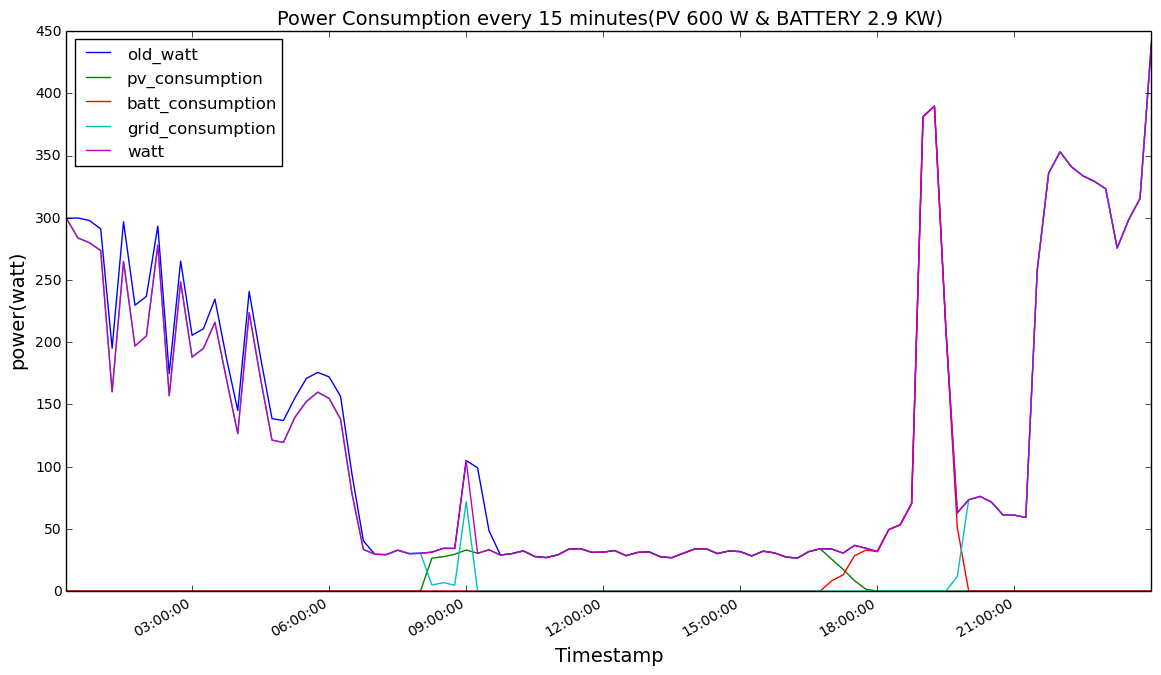

In [4]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2016-11-01 00:00:00'
time_b = '2016-11-01 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption,watt FROM thesis.main2 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

In [5]:
d = 30

time_a = pd.date_range('2016-11-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-11-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT Timestamp,old_watt,predicted_watt,target_watt,grid_consumption,watt FROM thesis.main2 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm &PVBATT || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"


2016-11-01 00:00:00 to 2016-11-30 23:59:59
Total unit consumption || No-algorithm &PVBATT || equal to 386.2617097 kW equal to 1609.7 bath
Total unit consumption equal to 385.6808003 kW equal to 1607.1 bath
Total power consumption from PEA equal to 338.386833158 kW equal to 1395.89 bath
